In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from glob import glob
from PIL import Image

In [281]:
def get_images(data_dir,label_dir):
    img_width=random.randint(170,241)
    img_height=img_width
    numpy_image = []
    numpy_label = []
    D = {}

    with tf.name_scope('input'):
        label_list=label_dir
        image_list=data_dir

        temp = np.array([image_list, label_list])
        temp = temp.transpose()
        np.random.shuffle(temp)
    
        image_list = list(temp[:, 0])
        label_list = list(temp[:, 1])
        label_list = [round(float(i)) for i in label_list] 
        
        image = tf.cast(image_list, tf.string)
        label = tf.cast(label_list, tf.int32)

        # make an input queue
        input_queue = tf.data.Dataset.from_tensor_slices((image,label))

        for ele in list(iter(input_queue)):
            next_item = ele
            print(next_item)

            label = next_item[1]
            label = tf.cast(label, tf.int32)

            image_contents = tf.io.read_file(next_item[0])
            image = tf.image.decode_jpeg(image_contents, channels=3)              

            image = tf.cast(image, tf.float32)

            image = tf.image.resize_with_crop_or_pad(image, img_width,  img_height)
            image = tf.image.resize(image, [80, 80],method=tf.image.ResizeMethod.BILINEAR) 

            image = tf.cast(image, tf.float32)
            
            numpy_image.append(image.numpy())
            numpy_label.append(label.numpy())
            
        
        for numpy_image,numpy_label in zip(numpy_image,numpy_label):
            D[numpy_label] = numpy_image
        np.save('Preprocess1.npy', D)
        

In [282]:
images = glob("Class*_*.jpg")
label = [2,3,4]
get_images(images,label)

(<tf.Tensor: shape=(), dtype=string, numpy=b'Class2_1.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Class3_4.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'Class4_0.jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=4>)


In [283]:
# np.save('Preprocess1.npz', image, allow_pickle=True)
b = np.load('Preprocess1.npy', allow_pickle=True)
# data = dict(np.load('Preprocess1.npy'), allow_pickle=True)

In [284]:
len(b[()])

3

In [285]:
# b.item().keys()

In [286]:
for k,v in b.item().items():
     h = v

In [287]:
im = Image.fromarray(np.uint8(b[0]))

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [288]:
im

<tf.Tensor: shape=(64, 64, 3), dtype=float32, numpy=
array([[[54.918495, 55.804726, 53.034836],
        [62.1752  , 61.54783 , 57.735664],
        [58.2184  , 55.320618, 53.36759 ],
        ...,
        [58.456562, 58.58599 , 57.801037],
        [65.748825, 65.87825 , 65.0933  ],
        [59.069927, 59.199356, 58.414402]],

       [[59.96923 , 60.855465, 56.286495],
        [55.953445, 55.326073, 52.96779 ],
        [56.645203, 53.752743, 52.96779 ],
        ...,
        [54.187366, 54.316795, 53.53184 ],
        [57.011185, 57.140617, 56.355663],
        [58.73173 , 58.86116 , 58.076206]],

       [[56.272125, 57.15836 , 53.274887],
        [55.921394, 55.29402 , 52.96779 ],
        [58.14888 , 55.251095, 52.96779 ],
        ...,
        [62.420437, 62.549866, 61.76491 ],
        [57.151905, 57.281334, 56.496384],
        [58.224438, 58.353867, 57.568913]],

       ...,

       [[62.194702, 60.15718 , 56.815067],
        [58.446167, 57.913395, 54.156216],
        [55.191902, 56.078136

In [291]:
# random_crop =[]
# for i in range(2):
# image = tf.cast(h, tf.float32)
random_crop = tf.image.random_crop(image, [64, 64, 3])
random_crop = tf.image.rot90(random_crop,k=random.randint(0,3))
random_crop = tf.image.random_flip_left_right(random_crop)
random_crop = tf.image.random_brightness(random_crop, max_delta=63)
im = tf.image.random_contrast(random_crop,lower=0.2,upper=1.8) 
# im = tf.image.per_image_standardization(im) 

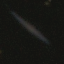

In [292]:
Image.fromarray(np.uint8(im))

In [258]:
RANDOM_CROP_FACTOR = 2  #for dev purposes
# def read_galaxy11(image):
random_crop = []
image_rot = []
random_flip = []
final = []

#data augmentation
for j in range(len(image)):
    for i in range(RANDOM_CROP_FACTOR):
        random_crop.append(tf.image.random_crop(image[i], [64, 64, 3]))

for i in range(len(random_crop)):
    for j in range(4):
        image_rot.append(tf.image.rot90(random_crop[i],k=random.randint(0,3)))

for i in range(len(image_rot)):
    for j in range(2):
        random_flip.append(tf.image.random_flip_left_right(image_rot[i]))

for i in range(len(random_flip)):    
    im = tf.image.random_brightness(random_flip[i], max_delta=63)
    im = tf.image.random_contrast(im,lower=0.2,upper=1.8) 
    im = tf.image.per_image_standardization(im) 
    final.append(im)



InvalidArgumentError: Incompatible shapes: [2] vs. [3] [Op:GreaterEqual]